In [1]:
import pandas as pd
import numpy as np
import os,sys,gc,re

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from datetime import datetime, timedelta, date
from collections import Counter

pd.options.display.max_rows = 2000
pd.options.display.max_columns = 200

pd.options.display.max_colwidth = 200
pd.options.display.precision = 4

from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

In [2]:
folder_path = '/Users/abhishek/Documents/zepto/'

In [3]:
# Data Reading
user_data_df = pd.read_csv(f"{folder_path}assignment.csv")
# Sample
user_data_df.sample(5)

,user_id,timestamp,purchase_value
94073,5c7bc21bf99d207872188a915e4ec15a3fe805ea0da1afa34d982a471be300de,2022-10-02 08:14:34.728,1203.0
196472,6081481f492090d3030ba35e718217fcadf12a77d895bfbcde553b0b8e9a86bd,2022-11-01 12:07:50.945,858.0
22531,c96b1f3bb661397231adc69c89353f6252f7cfd8bed353696fc29c5c579f22b1,2022-11-10 19:10:04.947,442.0
41190,1d5c68079964326ed05ef4769f39063a6abc63c582eaa4a59e643cf9457eedd2,2022-09-19 03:41:10.485,323.0
109557,7a97e7c2aed5d67d4b173c86ba50b5a5f096e4786028ddc6a7134b9a35a67330,2022-10-05 06:46:11.295,108.0


In [4]:
# Timestamp correction from string
# Ignoring millisecond values
# Can be added back by uncommenting
user_data_df['timestamp'] = user_data_df['timestamp'].apply(lambda x : 
                                datetime.strptime(x[:19],'%Y-%m-%d %H:%M:%S')
                                # + timedelta(seconds = int(x[-3:])/1000)
                               )

                   count      mean       std  min    25%    50%    75%     max
purchase_value  198101.0  383.3576  310.2899  9.0  197.0  296.0  474.0  7152.0


<AxesSubplot:xlabel='purchase_value', ylabel='Density'>

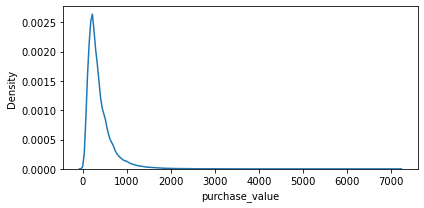

In [5]:
print(user_data_df.describe().transpose())
## Suggests right skewness in purchase values as expected given it's censored to positive values only

fig, ax = plt.subplots( figsize=(6, 3), tight_layout=True)

sns.kdeplot(user_data_df['purchase_value'])

In [6]:
## Time range for the dataset
min(user_data_df['timestamp']),max(user_data_df['timestamp'])

(Timestamp('2022-08-15 18:33:11'), Timestamp('2022-12-14 09:45:03'))

In [7]:
## No of Unique users 
print("No of unique users:",len(user_data_df['user_id'].unique()))

No of unique users: 23583


<AxesSubplot:ylabel='Count'>

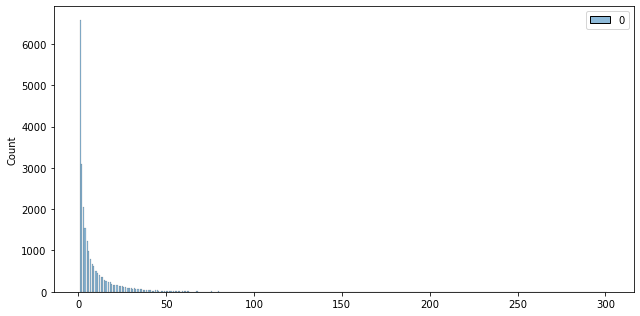

In [8]:
# plotting frequencies of purchase by users

# Users with very few purchase might not have sufficient data points other than timing of purchase
# unless augmented by user's demographic data , device info or cart spedific data
fig, ax = plt.subplots( figsize=(9, 4.5), tight_layout=True)

sns.histplot(Counter(user_data_df['user_id']).values())


In [9]:
#Count of frequency of purchase
count_freq_val = Counter(Counter(user_data_df['user_id']).values())
count_freq = pd.DataFrame(
    [list(count_freq_val.keys()), list(count_freq_val.values())], index=['Freq','Freq_count']).transpose()
count_freq.sort_values(by = 'Freq', ignore_index=True, inplace=True)
count_freq['Total'] = count_freq['Freq_count'].cumsum()

In [10]:
count_freq.transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128
Freq,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,84,85,86,87,88,89,90,91,92,94,95,96,97,98,99,100,101,103,104,105,106,107,108,109,111,113,114,117,118,128,132,133,135,136,140,141,144,150,156,157,166,174,179,184,208,220,301
Freq_count,6579,3087,2047,1542,1240,983,801,678,631,505,467,395,349,350,276,267,226,242,188,159,163,167,133,137,132,115,108,85,94,87,76,81,61,65,71,64,55,49,39,48,54,29,31,37,32,29,31,27,18,27,20,29,25,14,16,19,18,9,14,12,16,10,17,5,4,7,12,9,7,6,6,7,6,7,3,8,7,5,5,8,5,3,6,3,6,3,3,3,2,3,4,2,2,2,3,1,3,1,1,2,3,1,1,2,2,2,1,2,1,1,1,1,2,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1
Total,6579,9666,11713,13255,14495,15478,16279,16957,17588,18093,18560,18955,19304,19654,19930,20197,20423,20665,20853,21012,21175,21342,21475,21612,21744,21859,21967,22052,22146,22233,22309,22390,22451,22516,22587,22651,22706,22755,22794,22842,22896,22925,22956,22993,23025,23054,23085,23112,23130,23157,23177,23206,23231,23245,23261,23280,23298,23307,23321,23333,23349,23359,23376,23381,23385,23392,23404,23413,23420,23426,23432,23439,23445,23452,23455,23463,23470,23475,23480,23488,23493,23496,23502,23505,23511,23514,23517,23520,23522,23525,23529,23531,23533,23535,23538,23539,23542,23543,23544,23546,23549,23550,23551,23553,23555,23557,23558,23560,23561,23562,23563,23564,23566,23567,23568,23569,23570,23571,23572,23573,23575,23576,23577,23578,23579,23580,23581,23582,23583


start_time : 2022-08-16 00:03:11 
end_time   : 2022-12-14 15:15:03


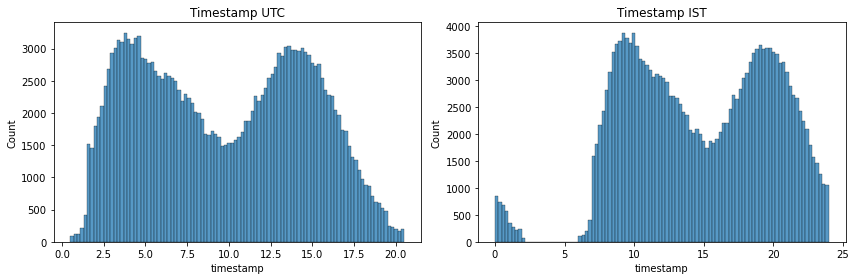

In [11]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(12, 4), tight_layout=True)


# sns.histplot(user_data_df['timestamp'].apply(lambda x : x.hour))
sns.histplot(user_data_df['timestamp'].apply(lambda x : x.hour+x.minute/60+x.second/3600),bins = 100, ax  = ax1)

## Timestamp correction suggests it needs correction for IST for five hours

## Adjusting for Indian standard time
## Data seems to be in UTC time zone

user_data_df['timestamp']  = user_data_df['timestamp'] + timedelta(hours = 5.5)
print('start_time :', min( user_data_df['timestamp']),'\nend_time   :', max(user_data_df['timestamp']))
# sns.histplot(user_data_df['timestamp'].apply(lambda x : (5.5+x.hour+x.minute/60+x.second/3600)%24))
sns.histplot(user_data_df['timestamp'].apply(lambda x : x.hour+x.minute/60+x.second/3600),bins = 100, ax = ax2)

ax1.title.set_text('Timestamp UTC')
ax2.title.set_text('Timestamp IST')

Text(0.5, 0.98, 'Total Transaction count with Time')

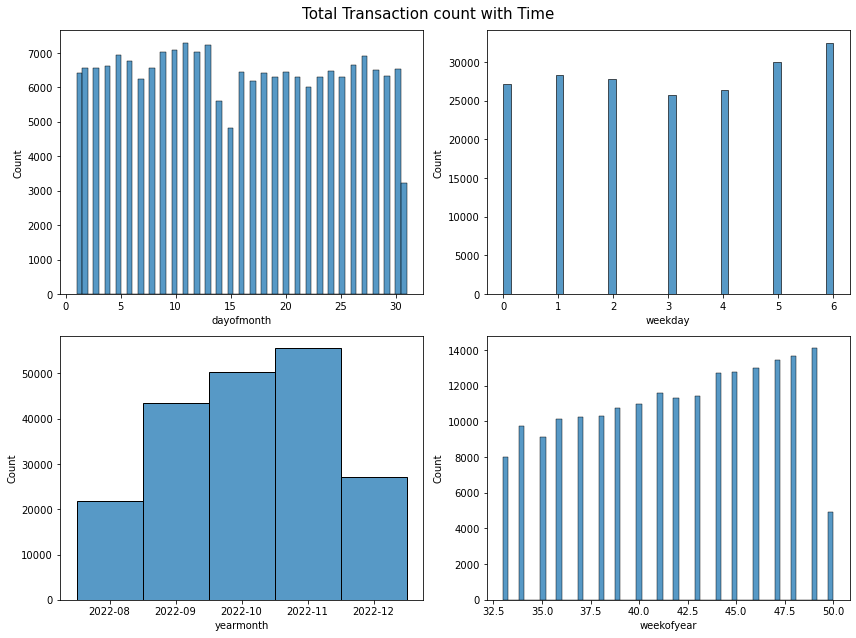

In [12]:
## Total Transaction count with Time

user_data_df['weekday'] = user_data_df['timestamp'].apply(lambda x : x.weekday())
user_data_df['dayofmonth'] = user_data_df['timestamp'].apply(lambda x : x.day)
user_data_df['yearmonth'] = user_data_df['timestamp'].apply(lambda x : datetime.strftime(x,'%Y-%m'))
user_data_df['weekofyear'] =  user_data_df['timestamp'].apply(lambda x : x.weekofyear)

user_data_df.sort_values(by = 'timestamp', ignore_index=True, inplace=True)
fig, ax = plt.subplots(2, 2, figsize=(12, 9), tight_layout=True)
sns.histplot(user_data_df['dayofmonth'], ax = ax[0][0])
sns.histplot(user_data_df['weekday'], ax = ax[0][1])
sns.histplot(user_data_df['yearmonth'],ax = ax[1][0])
sns.histplot(user_data_df['weekofyear'], ax = ax[1][1])

fig.suptitle("Total Transaction count with Time", fontsize=15)

## COMMENTS

1. Defining churn in strict terms is tricky, as the customer can come back anytime, as evident from data later.
2. **Demographic data about the user is missing**, limiting the Approaches to model the churn.
3. Distribution of Time suggests that it is in UTC and neets to be shifted by 5.5 hours to align with Indian timings.
4. 95% of users have done 33 or less trnsactions. Users can be segmented based on no of transcations, Aggregate value of transactions, and may be, by timing or transacations.
5. Based on transaction frequency of customers:

    > A larger number of users have very low number of transaction over given time period:
    >> 6579 with only 1 |
    >> Around 14000 with less than or equal to 5 (including 1)
    
    Out of total 23k users for given four months.
6. No of transactions is increasing with time (looking ast monthly/weekly data) and accounting for truncations in beginning/end. On Saturday and Sunday, the transactions are little high, and on

In [13]:
user_df_summary = user_data_df.groupby('user_id').agg(
    first_tt_time = ('timestamp','min'),
    last_tt_time = ('timestamp','max'),
    count_order = ('timestamp','count'),
    average_purchase = ('purchase_value','mean')).reset_index()

In [14]:
# ## Users who made their purchase in first month 
# user_df_summary01 = user_df_summary[
#      (user_df_summary['first_tt_time'] < datetime.strptime('20220916','%Y%m%d'))].copy()
# user_df_summary01

In [15]:
# ## Users who made their purchase in first month and also continued in last month
# user_df_summary[(user_df_summary['first_tt_time'] < datetime.strptime('20220916','%Y%m%d')) & 
#                (user_df_summary['last_tt_time'] > datetime.strptime('20221115','%Y%m%d'))]

In [16]:
# ## Users who made their purchase in first month and not in Last months
# user_df_summary[(user_df_summary['first_tt_time'] < datetime.strptime('20220916','%Y%m%d')) & 
#                (user_df_summary['last_tt_time'] <= datetime.strptime('20221115','%Y%m%d'))]

## Generating weekly aggregated series for users


In [17]:

user_df_summary2 = user_data_df.groupby(['user_id','weekofyear']).agg(
    count_order = ('timestamp','count'),
    average_purchase = ('purchase_value','mean'),
    total_purchase = ('purchase_value','sum')).reset_index()

df_user_summary = user_df_summary2.pivot(
    index=['user_id'],
    columns=['weekofyear'],
    values=['count_order','total_purchase']
).reset_index()
df_user_summary.columns = [str(i)+str(j) for (i,j) in df_user_summary.columns]

df_user_summary.to_excel(f'{folder_path}user_series.xlsx')

df_user_summary.sample(5, random_state=59)

,user_id,count_order33,count_order34,count_order35,count_order36,count_order37,count_order38,count_order39,count_order40,count_order41,count_order42,count_order43,count_order44,count_order45,count_order46,count_order47,count_order48,count_order49,count_order50,total_purchase33,total_purchase34,total_purchase35,total_purchase36,total_purchase37,total_purchase38,total_purchase39,total_purchase40,total_purchase41,total_purchase42,total_purchase43,total_purchase44,total_purchase45,total_purchase46,total_purchase47,total_purchase48,total_purchase49,total_purchase50
1428,0f965beb0247afbf5f4253f25d5082f1a71633e91472cdfb78ee75532a8537ac,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,309.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17268,bb8f00f8b28f53d5be348491b785d0ef3a53fc05b0d7ef0817110807210dc3fc,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,225.0,NaN,206.0,NaN,158.0,NaN,NaN,NaN,NaN,NaN,342.0,NaN,NaN
15460,a7dd9ce4391531ad68431745fb02db777c613a159d792981ca660b8c80f7ec0b,NaN,1.0,1.0,2.0,4.0,2.0,NaN,4.0,2.0,1.0,NaN,NaN,1.0,2.0,2.0,NaN,NaN,NaN,NaN,149.0,195.0,778.0,1210.0,501.0,NaN,1619.0,457.0,420.0,NaN,NaN,431.0,695.0,1359.0,NaN,NaN,NaN
13670,9527e33d92edcd962b245c9e2bf8c64973321a55769265f79994e6ab00fa1228,4.0,5.0,2.0,2.0,4.0,3.0,2.0,4.0,5.0,6.0,4.0,4.0,2.0,1.0,3.0,3.0,3.0,1.0,823.0,1767.0,661.0,1006.0,1211.0,1617.0,962.0,946.0,2399.0,1820.0,1062.0,895.0,989.0,380.0,1189.0,1462.0,1103.0,231.0
2622,1cb6be1b93a5e51fabe26bea1288e6b1c6d8eab71db5cd0dce1975015b7ad6fb,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,146.0,NaN,455.0,NaN,NaN,NaN,NaN,330.0,NaN,NaN,249.0,154.0,172.0,335.0


### Generating other transformations that might be utilized

In [18]:
# ## 24 hour time transformation to circular 2 variable representation (sin, cos)
# ## In case needed for transcation level modelling
# multiplier = 2*np.pi/24
# user_data_df['timestamp'].apply(lambda x : -12+x.hour+x.minute/60+x.second/3600)*multiplier


# np.sin(user_data_df['timestamp'].apply(lambda x : x.hour+x.minute/60+x.second/3600)*multiplier)
# np.cos(user_data_df['timestamp'].apply(lambda x : x.hour+x.minute/60+x.second/3600)*multiplier)

# CHURN
### Looking for time filters to define churn from data

In [19]:
user_data_df.sort_values(by = ['user_id', 'timestamp'], ignore_index=True, inplace=True)
user_data_df['timestamp_lag1'] = user_data_df.groupby(['user_id'])['timestamp'].shift(1)

user_data_df['time_since_last_transaction'] = (user_data_df['timestamp'] - user_data_df['timestamp_lag1']).apply(
    lambda x : round(x.total_seconds()/86400,1) if x else np.nan)

user_data_df.drop(columns=['timestamp_lag1'], inplace=True)

Text(0.5, 0.98, 'Time between consecutive transaction of users')

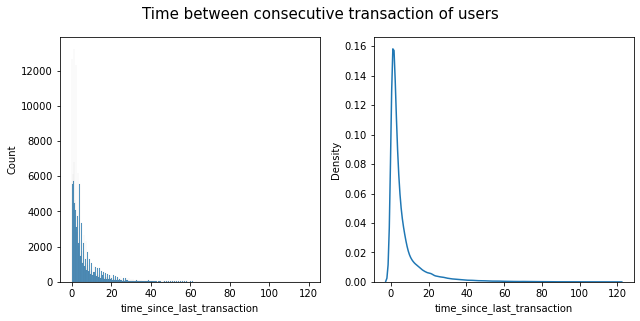

In [20]:
# time_since_last_transaction (For any given transation for all users)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 4.5), tight_layout=True)
sns.histplot(user_data_df['time_since_last_transaction'], ax=ax1)
sns.kdeplot(user_data_df['time_since_last_transaction'],ax = ax2)

fig.suptitle("Time between consecutive transaction of users", fontsize=15)

In [21]:
pd.DataFrame(
    [[0.0,0.25,0.50,0.75,0.90,0.95,0.99,1.0],
    list(np.quantile(user_data_df['time_since_last_transaction'].dropna(),[0.0,0.25,0.50,0.75,0.90,0.95,0.99,1.0]))],
    index = ['quantile','value']).transpose()

,quantile,value
0,0.00,0.00
1,0.25,1.10
2,0.50,2.90
3,0.75,7.00
4,0.90,16.93
5,0.95,26.50
6,0.99,54.70
7,1.00,119.60


In [22]:
user_profile = user_data_df.groupby('user_id').agg(
    transaction_count = ('timestamp','count'),
    first_tt_time = ('timestamp','min'),
    last_tt_time = ('timestamp','max'),
    mean_time_diff = ('time_since_last_transaction','mean'),
    median_time_diff = ('time_since_last_transaction','median'),
    average_purchase = ('purchase_value','mean'),
    total_purchase = ('purchase_value','sum')).reset_index()

user_profile['time_from_last_transaction'] = \
(max(user_data_df['timestamp']) - user_profile['last_tt_time']).apply(lambda x : round(x.total_seconds()/86400,1))


In [23]:
pd.DataFrame(
    [[0.0,0.25,0.50,0.75,0.90,0.95,0.99,1.0],
    list(np.quantile(user_profile['mean_time_diff'].dropna(),[0.0,0.25,0.50,0.75,0.90,0.95,0.99,1.0]))],
    index = ['quantile','value']).transpose()

,quantile,value
0,0.00,0.0000
1,0.25,4.7495
2,0.50,9.4000
3,0.75,18.0000
4,0.90,31.5000
5,0.95,44.0925
6,0.99,80.0000
7,1.00,119.6000


Text(0.5, 0.98, 'Time since last transaction till end time')

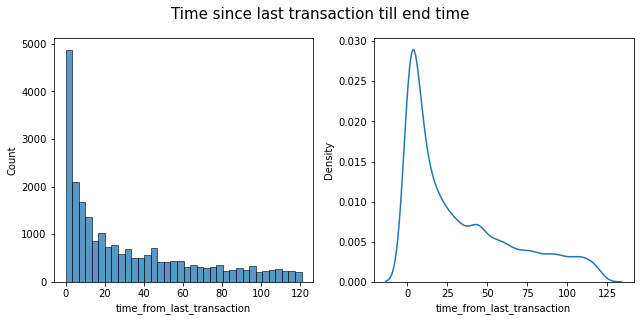

In [24]:
# time from last transcation till EOD
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 4.5), tight_layout=True)
sns.histplot(user_profile['time_from_last_transaction'], ax=ax1)
sns.kdeplot(user_profile['time_from_last_transaction'],ax = ax2)

fig.suptitle("Time since last transaction till end time", fontsize=15)

In [25]:
pd.DataFrame(
    [[0.0,0.25,0.50,0.75,0.90,0.95,0.99,1.0],
    list(np.quantile(user_profile['time_from_last_transaction'],[0.0,0.25,0.50,0.75,0.90,0.95,0.99,1.0]))],
    index = ['quantile','value']).transpose()

,quantile,value
0,0.00,0.00
1,0.25,4.70
2,0.50,19.80
3,0.75,52.95
4,0.90,88.30
5,0.95,103.90
6,0.99,116.90
7,1.00,120.60


In [26]:
pd.DataFrame(
    [list(np.arange(101)/100),
    list(np.quantile(user_profile['time_from_last_transaction'],list(np.arange(101)/100)))],
    index = ['quantile','value'])


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
quantile,0.0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.2,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.3,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.4,0.41,0.42,0.43,0.44,0.45,0.46,0.47,0.48,0.49,0.5,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59,0.60,0.61,0.62,0.63,0.640,0.65,0.66,0.67,0.68,0.69,0.7,0.71,0.72,0.73,0.74,0.75,0.76,0.77,0.78,0.79,0.8,0.81,0.82,0.83,0.84,0.85,0.86,0.87,0.88,0.89,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1.0
value,0.0,0.10,0.20,0.30,0.70,0.80,0.80,0.90,1.10,1.20,1.3,1.70,1.80,1.90,2.20,2.30,2.80,2.80,3.00,3.10,3.2,3.70,3.80,4.10,4.20,4.70,4.90,5.30,5.80,6.20,6.8,7.10,7.70,8.10,8.80,9.10,9.80,10.10,10.70,11.00,11.7,12.20,13.10,13.90,14.80,15.80,16.70,17.10,17.90,18.80,19.8,20.80,21.80,22.90,24.00,24.80,25.80,26.90,28.30,29.90,31.02,32.00,33.10,34.90,36.444,38.10,39.70,41.60,42.70,43.80,44.9,45.90,47.20,49.20,51.10,52.95,54.80,56.80,58.90,60.20,62.7,64.90,67.00,69.80,72.60,74.90,77.30,79.90,82.70,86.00,88.3,91.30,94.20,96.90,100.70,103.90,106.90,109.80,113.10,116.90,120.6


In [27]:
df_user_summary = user_df_summary2.pivot(
    index=['user_id'],
    columns=['weekofyear'],
    values=['count_order','total_purchase']
).reset_index()
# df_user_summary.columns = [str(i)+str(j) for (i,j) in df_user_summary.columns]

In [28]:
print('For a filter of 6 weeks')
print('wk cust churn back_later')

for weeks in range(33,39):
    index = df_user_summary['count_order'][weeks].dropna().index
    df_temp = df_user_summary['count_order'].take(index)[
        df_user_summary['count_order'].columns[df_user_summary['count_order'].columns > weeks]
    ].fillna(0).copy()
    
    df_temp2 = pd.DataFrame(
        (df_temp[df_temp.columns[df_temp.columns <= weeks+6]].sum(axis=1).apply(lambda x : 1 if x == 0 else 0),
         df_temp[df_temp.columns[df_temp.columns > weeks+6]].sum(axis=1).apply(lambda x : 1 if x > 0 else 0)),
        index = ['6_week','next']).transpose()
    
    print(weeks, df_temp2.shape[0],sum(df_temp2['6_week']),sum(df_temp2['6_week']*df_temp2['next']))
    del index, df_temp,df_temp2

    gc.collect()


For a filter of 6 weeks
wk cust churn back_later
33 5038 722 330
34 5732 872 359
35 5561 832 319
36 5998 900 351
37 6000 934 337
38 5942 829 291


## COMMENTS

Mean time between consecutive tranactions is calculated for all users. (It does not account around 6000 users). We find the 95th percentile is around 44 days and 99th percentile is around 80 days. 

**A direct cutoff to define the Churn might not be right as the customers
might come back, even after longer times, but the probability will be low as visible in above table couting customers who churned based on a filter of six week and among those who came back.**

**Hence we need to fit a Joing distirbution based on 'Age' and time since last
transaction for the customer to undestand churn.**

## Utilizing CLV Models for Churn Prediction
### library lifetimes in python
#### Data Preparation

In [29]:
user_lifetime_data = user_profile[['user_id','transaction_count','first_tt_time','last_tt_time','average_purchase']].copy()


## Daily 86400, hourly 3600
time_divider = 86400   

user_lifetime_data['frequency'] = user_lifetime_data['transaction_count']-1

user_lifetime_data['T'] = (max(user_data_df['timestamp'])-user_lifetime_data['first_tt_time']).apply(
    lambda x : round(x.total_seconds()/time_divider,1))

# user_lifetime_data['recency'] = (max(user_data_df['timestamp']) - user_lifetime_data['last_tt_time']).apply(
#     lambda x : round(x.total_seconds()/time_divider,1))

user_lifetime_data['recency'] = (user_lifetime_data['last_tt_time'] - user_lifetime_data['first_tt_time']).apply(
    lambda x : round(x.total_seconds()/time_divider,1))



user_lifetime_data.rename(columns={'average_purchase':'monetary_value'}, inplace=True)
user_lifetime_data = user_lifetime_data[['user_id','frequency','T','recency','monetary_value']].copy()


# Setting recency to zero when there is only one transaction in given time period
# As per model requirement
user_lifetime_data.loc[user_lifetime_data.index[user_lifetime_data['frequency']==0], 'recency'] = 0

user_lifetime_data.sample(10)



,user_id,frequency,T,recency,monetary_value
1787,13400a0c050c150c35ea843ea8ec457bb2df5797042da8103f1c27186e183b66,0,0.1,0.0,114.0000
20743,e15d06569198610fb9acc73d95c0e775be6e7f3b3a872f1788f4fa9f79a374fa,1,119.2,2.5,260.0000
19229,d0d56655406e0db9d89934030df57ed3ad45c6c4f8b1af844e1b70f3e728fb9d,3,57.1,47.9,390.2500
18704,cb0c46c119328ff4b4296d43b538c01c83f7a79c60b7105d01452332f999a2b9,4,120.1,74.1,311.8000
15452,a7c7d1fffd57039fb8624264d1669e5c57ed44d635368c58b6f68e89804f8709,0,0.2,0.0,268.0000
8583,5e43a511d25b2eb39b3821de7154787d8f0184efd4b9e6a6a28d92dda6ec9e8c,9,119.2,119.0,251.8000
16323,b16e74695d0a038f7edb9823b22855d0c6c22771fe5a3b5b1620f5b48a11b908,3,81.6,71.4,446.0000
9998,6d2c62f04fa2b2f0ce26ae007ba5411c1fdd2494b088920e9fc176a085bc47ed,2,60.3,1.0,366.3333
14512,9e498f2f347017bd4399651a9b5aedd255f70809cd13a4acda8e0ebc862aff0d,87,119.3,118.1,425.7614
2985,20d7a8daffe92801aa3b1215d2b2080cdc9390fe604bdd07ae5dd7701c450de7,17,84.2,80.3,312.6111


In [30]:
# import warnings
# warnings.filterwarnings("ignore")

In [31]:
from lifetimes import BetaGeoFitter
bgf = BetaGeoFitter(penalizer_coef=0.01)
# penalizer_coef BetaGeoBetaBinomFitter helpful in converging the training
bgf.fit(user_lifetime_data['frequency'], user_lifetime_data['recency'], user_lifetime_data['T'])

<lifetimes.BetaGeoFitter: fitted with 23583 subjects, a: 0.05, alpha: 5.74, b: 0.65, r: 0.56>

<AxesSubplot:title={'center':'Probability Customer is Alive,\nby Frequency and Recency of a Customer'}, xlabel="Customer's Historical Frequency", ylabel="Customer's Recency">

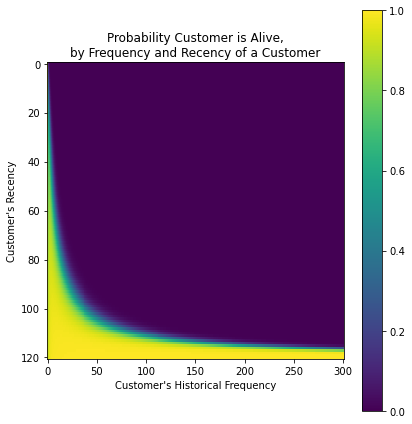

In [32]:
from lifetimes.plotting import plot_probability_alive_matrix
fig, ax = plt.subplots( figsize=(6, 6), tight_layout=True)
plot_probability_alive_matrix(bgf)

### Predicting  Churn Probability of customers


In [33]:
user_lifetime_data['probability_alive'] = bgf.conditional_probability_alive(
    user_lifetime_data['frequency'], user_lifetime_data['recency'], user_lifetime_data['T'])

### CLV for Top users
 Based on transctions count, top 5% users have around 33 or more transactions per year.
 
 Assumeing 10 years period and 5% margin.
 
**Note:** Use of DCF to get CLV requires assumptions on Growth/Inflation, operating margins, risk factors on company  and risk free rates (for determining the discounts the cash flows), and Expenditure to get the customer (for net margins) and capital needed to be maintained to serve the customer (to get the actual cash flow) and can be played along to fit any number due to lot of variables. 

Hence, estimating CLV with very basic model, for a lifespan to total 10 years and margins of 5 percentage.
 
#### Estimating No of transactions in 1 yr, 10 yr based on Fitted model

In [39]:
user_lifetime_data['1_yr_tr_estimate'] = round(bgf.conditional_expected_number_of_purchases_up_to_time(
    365,
    user_lifetime_data['frequency'],
    user_lifetime_data['recency'],
    user_lifetime_data['T']),0)
user_lifetime_data['10yr_tr_estimate'] = round(bgf.conditional_expected_number_of_purchases_up_to_time(
    3650,
    user_lifetime_data['frequency'],
    user_lifetime_data['recency'],
    user_lifetime_data['T']),0)

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [40]:
top_user_data = user_lifetime_data[user_lifetime_data['frequency']>32].reset_index(drop = True).copy()

In [41]:
top_user_data['CLV'] = round(top_user_data['10yr_tr_estimate']*top_user_data['monetary_value']*0.05)

In [42]:
top_user_data

,user_id,frequency,T,recency,monetary_value,probability_alive,1_yr_tr_estimate,10yr_tr_estimate,CLV
0,00276702d3dfe405faae5865d69f7591f17cfb3b4911a407d2b2e49740b1e4d6,60,119.1,116.8,361.3607,9.9718e-01,169.0,1538.0,27789.0
1,0055584dd920f8978d76dee28f986668e1aa8da1607d2ca1a7550f7b31e67992,40,118.9,117.6,299.3659,9.9789e-01,113.0,1032.0,15447.0
2,00fb8628be79ccd078d9446e624aebc2969e7615e880adbc330ca849e6b68c53,42,110.8,109.7,444.2791,9.9804e-01,127.0,1155.0,25657.0
3,0152604b57856031d6fe1867306d87a28731e6d9cbd1e75670053f4e27043f6c,40,107.2,101.3,329.0488,9.8798e-01,123.0,1122.0,18460.0
4,0165295757070b63972e7bdd336eee219c0b7e2ea77234319383fefcc2986910,61,119.6,118.8,327.0645,9.9866e-01,171.0,1560.0,25511.0
5,017a1bd1b23a69234d5d8bfb045e038c243e0396b669b3f95d20c03f0aeb8612,33,116.9,116.0,331.1765,9.9786e-01,95.0,867.0,14356.0
6,0188fbe60664063b5adc955de224a1bb4879b807719be6b1bab466cd37af4460,35,119.9,112.0,538.7778,9.8434e-01,97.0,886.0,23868.0
7,01df9b57cf4c9083a8e66c8bde803788d0a187a646f4867c3e2d697c8d6817ed,48,117.0,113.0,366.0408,9.9429e-01,137.0,1249.0,22859.0
8,01f4a5a5faddad3606e9e042f2d17d411e52b5a323a2f958276d9199dfc3c407,36,106.3,103.1,271.6216,9.9559e-01,113.0,1027.0,13948.0
9,0205f63e5ceb9cb2760e1165e5f23b6192d7e64675bac40f391ce12e4a92ec8a,54,119.8,117.0,255.5636,9.9652e-01,151.0,1377.0,17596.0


### Other Exercise to fit the average transaction values using GammaGammaFitter

In [49]:
user_lifetime_data_2 = user_lifetime_data[user_lifetime_data['frequency']>0].copy()
user_lifetime_data_2[['frequency','monetary_value']].corr()

,frequency,monetary_value
frequency,1.000000,0.162806
monetary_value,0.162806,1.000000


In [44]:
from lifetimes import GammaGammaFitter
ggf = GammaGammaFitter(penalizer_coef=0.1)

ggf.fit(user_lifetime_data_2['frequency'], user_lifetime_data_2['monetary_value'])

<lifetimes.GammaGammaFitter: fitted with 17004 subjects, p: 1.00, q: 0.18, v: 0.93>

In [38]:
# from lifetimes import ParetoNBDFitter
# pnf = ParetoNBDFitter(penalizer_coef=0.01)
# pnf.fit(user_lifetime_data['frequency'], user_lifetime_data['recency'], user_lifetime_data['T'])